## Jaya Verma
U49432491

## Subject - Engineering the Supply Chain
### Topic: Supply Chain Module - Extra Credit

# Adaptive Exponential Smoothing: Forecasting model.

In [10]:
import numpy as np

class DemandForecaster:
    """
    This class implements an adaptive exponential smoothing forecast.
    It adjusts the smoothing factor alpha dynamically based on forecast error.
    """
    def __init__(self, initial_alpha=0.1, error_sensitivity=0.2):
        """
        Initialize the forecaster with a given initial alpha (smoothing factor)
        and sensitivity for adapting alpha based on previous forecast error.
        """
        self.alpha = initial_alpha
        self.error_sensitivity = error_sensitivity
        self.forecasts = []

    def adaptive_forecast(self, demand_series):
        """
        Generates an adaptive forecast for a given demand series using exponential smoothing.
        
        Args:
            demand_series (list): List of historical demand values.

        Returns:
            list: Forecasted values with the same length as the input demand series.
        
        Raises:
            ValueError: If the input demand series is empty.
        """
        n = len(demand_series)
        if n == 0:
            raise ValueError("Demand series is empty")

        # Initialize the forecast with the first actual value
        forecast = demand_series[0]
        self.forecasts = [forecast]

        # Update forecast for each time step
        for t in range(1, n):
            # Calculate forecast error from previous time step
            error = demand_series[t - 1] - self.forecasts[-1]

            # Adapt alpha within bounds [0.01, 0.99] based on error
            self.alpha = min(max(self.alpha + self.error_sensitivity * error, 0.01), 0.99)

            # Compute new forecast using exponential smoothing
            forecast = self.alpha * demand_series[t - 1] + (1 - self.alpha) * self.forecasts[-1]
            self.forecasts.append(forecast)

        return self.forecasts

class ForecastAnalyzer:
    """
    A utility class to compute forecast error metrics for evaluation.
    """
    @staticmethod
    def calculate_errors(actual, forecasted):
        """
        Calculates common forecast error metrics: MAE, MSE, and MAPE.
        
        Args:
            actual (list): Actual demand values.
            forecasted (list): Corresponding forecasted values.
        
        Returns:
            dict: Dictionary containing MAE, MSE, and MAPE values.
        """
        errors = np.array(actual) - np.array(forecasted)
        mae = np.mean(np.abs(errors))                     # Mean Absolute Error
        mse = np.mean(errors**2)                          # Mean Squared Error
        mape = np.mean(np.abs(errors / np.array(actual))) * 100  # Mean Absolute Percentage Error
        return {"MAE": mae, "MSE": mse, "MAPE": mape}

class SupplyChainModule:
    """
    This module integrates forecasting and error analysis for a supply chain demand dataset.
    """
    def __init__(self, demand_data):
        """
        Initializes the supply chain module with demand data and helper components.
        
        Args:
            demand_data (list): Time-series demand data to be forecasted.
        """
        self.demand_data = demand_data
        self.forecaster = DemandForecaster()
        self.analyzer = ForecastAnalyzer()

    def run_forecasting(self):
        """
        Executes the forecasting process and evaluates its accuracy.
        
        Returns:
            tuple: A list of forecasted values and a dictionary of error metrics.
        """
        forecasted = self.forecaster.adaptive_forecast(self.demand_data)
        metrics = self.analyzer.calculate_errors(self.demand_data, forecasted)
        return forecasted, metrics


Forecasted Demand: [120, 120.0, 129.89999999999998, 129.85099999999997, 139.89851, 149.8989851, 159.898989851, 159.74999995249]
Error Metrics: {'MAE': 8.112561837936251, 'MSE': 84.45315016987234, 'MAPE': 5.656091987327935}


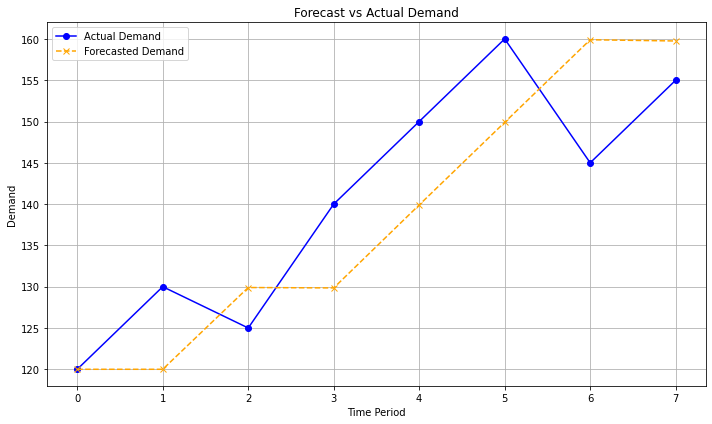

In [11]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Sample demand data (replace with actual supply chain demand)
    demand = [120, 130, 125, 140, 150, 160, 145, 155]

    scm = SupplyChainModule(demand)
    forecast, metrics = scm.run_forecasting()

    print("Forecasted Demand:", forecast)
    print("Error Metrics:", metrics)

    # --- Visualization ---
    plt.figure(figsize=(10, 6))
    plt.plot(demand, marker='o', label='Actual Demand', color='blue')
    plt.plot(forecast, marker='x', linestyle='--', label='Forecasted Demand', color='orange')
    plt.title("Forecast vs Actual Demand")
    plt.xlabel("Time Period")
    plt.ylabel("Demand")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Multi-Objective Transportation Problem - Optimization module

In [17]:
import pulp

class TransportationOptimizer:
    def __init__(self, supply, demand, cost_matrix, time_matrix, weight_cost=0.5, weight_time=0.5):
        """
        Parameters:
        - supply: List of supply values for each source.
        - demand: List of demand values for each destination.
        - cost_matrix: Dict of dicts representing transportation cost from source to destination.
        - time_matrix: Dict of dicts representing delivery time from source to destination.
        - weight_cost: Weight for cost in multi-objective function (between 0 and 1).
        - weight_time: Weight for time in multi-objective function (between 0 and 1).
        """
        self.supply = supply
        self.demand = demand
        self.sources = list(range(len(supply)))
        self.destinations = list(range(len(demand)))
        self.cost_matrix = cost_matrix
        self.time_matrix = time_matrix
        self.weight_cost = weight_cost
        self.weight_time = weight_time

    def optimize(self):
        prob = pulp.LpProblem("Multi_Objective_Transportation", pulp.LpMinimize)

        # Decision variables
        x = pulp.LpVariable.dicts("Route", (self.sources, self.destinations), 0, None, pulp.LpContinuous)

        # Objective: weighted sum of cost and time
        prob += pulp.lpSum(
            (self.weight_cost * self.cost_matrix[i][j] + self.weight_time * self.time_matrix[i][j]) * x[i][j]
            for i in self.sources for j in self.destinations
        )

        # Supply constraints
        for i in self.sources:
            prob += pulp.lpSum(x[i][j] for j in self.destinations) <= self.supply[i], f"Supply_{i}"

        # Demand constraints
        for j in self.destinations:
            prob += pulp.lpSum(x[i][j] for i in self.sources) >= self.demand[j], f"Demand_{j}"

        # Solve
        prob.solve()

        result = {
            "Objective Value": pulp.value(prob.objective),
            "Shipments": {(i, j): x[i][j].varValue for i in self.sources for j in self.destinations if x[i][j].varValue > 0},
            "Status": pulp.LpStatus[prob.status]
        }

        return result


In [18]:
if __name__ == "__main__":
    supply = [20, 30]
    demand = [10, 15, 25]

    cost_matrix = {
        0: {0: 8, 1: 6, 2: 10},
        1: {0: 9, 1: 7, 2: 4}
    }

    time_matrix = {
        0: {0: 1, 1: 3, 2: 2},
        1: {0: 2, 1: 1, 2: 2}
    }

    optimizer = TransportationOptimizer(supply, demand, cost_matrix, time_matrix, weight_cost=0.6, weight_time=0.4)
    results = optimizer.optimize()
    print("Status:", results["Status"])
    print("Objective Value:", results["Objective Value"])
    print("Shipments:")
    for (i, j), val in results["Shipments"].items():
        print(f"  From Source {i} to Destination {j}: {val}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jayaverma/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/_8/mq34yrbj1hz747klc8_wlnvr0000gn/T/4bec8553583d42558f383ae7608310e7-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/_8/mq34yrbj1hz747klc8_wlnvr0000gn/T/4bec8553583d42558f383ae7608310e7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 29 RHS
At line 35 BOUNDS
At line 36 ENDATA
Problem MODEL has 5 rows, 6 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 5 (0) rows, 6 (0) columns and 12 (0) elements
0  Obj 0 Primal inf 50 (3)
4  Obj 203
Optimal - objective value 203
Optimal objective 203 - 4 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

Statu